In [29]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_excel('Closed_INC_01Jan-31Jan.xlsx', sheet_name=1)

In [37]:
df.head()

,Number,Opened,Created,Short description,Category,Caller,Priority,State,Assignment group,Assigned to,Updated,Updated by
0,INC0087058,2022-12-24 20:30:31,2022-12-24 20:39:05,MVW - EHR missing GillRK,MVW,"Gill, Rajwinder (Rajwinder.Gill2@sutterhealth....",2 - High,Closed,Access-Active Directory Domain,"Amer Mohd Jafar, Shaik Mohammad (ShaikMohammad...",2023-01-01 02:00:11,system
1,INC0084178,2022-12-22 20:22:31,2022-12-22 20:37:30,MVW - Unable to Access - Please create Home Dr...,MVW,"Tan, Ralph Curt",2 - High,Closed,Access-Active Directory Domain,"Deshmukh, Satyam (Satyam.Deshmukh@sutterhealth...",2023-01-01 18:00:05,system
2,INC0090247,2022-12-27 11:02:18,2022-12-27 11:07:10,Access- MVW,MVW,"Ona, Marta (Marta.Ona@sutterhealth.org)",4 - Low,Closed,Access-Active Directory Domain,"D B, Krishna (Krishna.DB@sutterhealth.org)",2023-01-03 12:00:13,system
3,INC0094548,2022-12-28 22:46:27,2022-12-28 23:02:36,MVW - GG Missing in AD Acct,MVW,"Bush, Brenda (Brenda.Bush2@sutterhealth.org)",2 - High,Closed,Access-Active Directory Domain,"Deshmukh, Satyam (Satyam.Deshmukh@sutterhealth...",2023-01-05 00:00:27,system
4,INC0096766,2022-12-29 16:01:46,2022-12-29 16:12:42,MVW - unable to access,MVW,"France, Austin",4 - Low,Closed,Access-Active Directory Domain,"Gopakumar, Theertha (Theertha.Gopakumar@sutter...",2023-01-06 12:00:58,system


In [38]:
drop_cols = ["Number", "Opened", "Created", "Caller", "Priority", "State", "Assignment group", "Assigned to", "Updated", "Updated by"]

In [39]:
df.drop(drop_cols, inplace=True, axis='columns')

In [25]:
df

,Short description,Category,Updated by
0,MVW - EHR missing GillRK,MVW,system
1,MVW - Unable to Access - Please create Home Dr...,MVW,system
2,Access- MVW,MVW,system
3,MVW - GG Missing in AD Acct,MVW,system
4,MVW - unable to access,MVW,system
...,...,...,...
2077,Active Directory - Email needs to be created f...,AD,system
2078,Request customer be added to the app-powershar...,AD,system
2079,R1 RCM Transition - restrict view in \\dcms2ms...,Shared Drive,system
2080,No AD attached in sailpoint,AD,system


In [41]:
df.isna().sum()

Short description    0
Category             0
dtype: int64

In [42]:
df.columns = ["SD", "Cat"]

In [43]:
df

,SD,Cat
0,MVW - EHR missing GillRK,MVW
1,MVW - Unable to Access - Please create Home Dr...,MVW
2,Access- MVW,MVW
3,MVW - GG Missing in AD Acct,MVW
4,MVW - unable to access,MVW
...,...,...
2077,Active Directory - Email needs to be created f...,AD
2078,Request customer be added to the app-powershar...,AD
2079,R1 RCM Transition - restrict view in \\dcms2ms...,Shared Drive
2080,No AD attached in sailpoint,AD


<Axes: xlabel='Cat'>

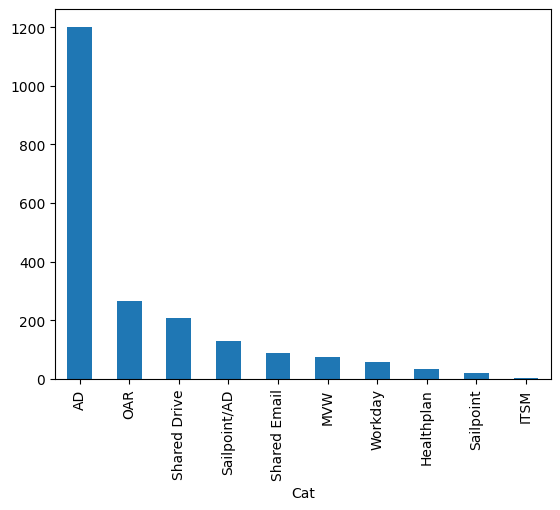

In [46]:
df['Cat'].value_counts().plot.bar()

In [48]:
from sklearn.model_selection import train_test_split


In [50]:
X_train, X_test, y_train, y_test = train_test_split(df["SD"], df["Cat"], test_size=0.33, random_state=123)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1394,)
(688,)
(1394,)
(688,)


In [54]:
from sklearn.feature_extraction.text import CountVectorizer


In [55]:
cv = CountVectorizer()

In [ ]:
X_train_cv = cv.fit_transform(X_train)